## Import tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns

## Create data

In [142]:
np.random.seed(1)
X, y = make_classification(n_samples=200,n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [143]:
X.shape

(200, 2)

In [144]:
y.shape

(200,)

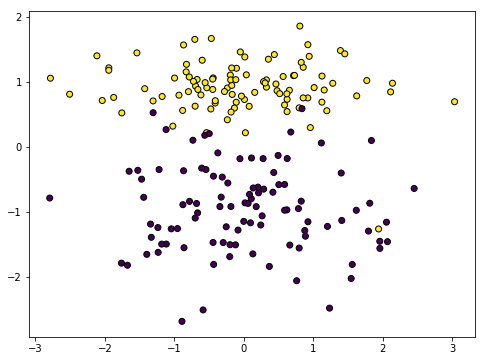

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker='o', c=y, edgecolors='k')

In [80]:
X[:10,:]

array([[ 1.00745909,  0.10622272],
       [-1.03520569, -1.2197444 ],
       [ 0.97565497, -0.08450803],
       [ 1.05665938, -0.19883786],
       [ 0.96569093,  1.93752881],
       [-1.38383167,  0.01740941],
       [ 0.99781956, -0.95542526],
       [ 1.01692105,  0.92145007],
       [ 0.98541415, -1.11647002],
       [ 0.9886947 ,  0.36633201]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
X_train.shape

(120, 2)

In [83]:
X_test.shape

(30, 2)

## Create model

In [84]:
class ClassificationLinearCustom():
    """
        Implementation Classification Linear Model.
    """
    
    def __init__(self, learning_rate=0.0001, max_iter=100):
        """
            Initializer parameters model
        """
        self.lrate=learning_rate
        self.max_iter=max_iter
        self.coefs_=None
        self.error_gradient = None
        self.is_fited = False
        
    def sigmoid(self, coefs, x):
        """
            Sigmoid funtion
        """
        return 1/(1+np.exp(-(coefs*x).sum()))
        
    def error_coefs(self, coefs, xi, yi, m, lr):
        """
            Calcul coefs gradient:
            -- Parameters :
                - xi : value for one sample in data
                - yi : real value prediction for this precedent sample
                - m : dataset size
                - lr : learning rate
        """
        return lr/m * (xi.T*self.sigmoid(coefs, xi)-yi)
        
    
    def fit(self,x, y):
        """
            Fit fuction, learning parameters
            -- Parameters:
                - x, sample data
                - y, predict data
        """
        #scalling data
        x = (x-x.min())/(x.max()-x.min())
        
        if x.shape[0] != y.shape[0]:
            return ValueError("x and y must have same sample")
        
        m = x.shape[0] # size du dataset
        self.coefs_ = 1 # nuers of features
        for _ in range(self.max_iter):
            for xi,yi in zip(x,y):
                self.coefs_ -= self.error_coefs(self.coefs_, xi, yi, m, self.lrate) 
         
        self.is_fited = True
        print('ClassificationLinearCustom(learning_rate={}, max_iter={})'.format(self.lrate, self.max_iter))
    
    def predict(self, x):
        """
            Predict function : 
            -- Parameters:
                - x, sample data what to predict
        """
        ypred_proba = []
        if not self.is_fited:
            return ValueError("model must fited after predict")
        if x.shape[1] != self.coefs_.shape[0]:
            return ValueError("The features of x do not have the same size as those to train")
        for xi in x:
            ypred_proba +=[1] if self.sigmoid(self.coefs_, xi) >= 0.5 else [0]
        return np.array(ypred_proba)

## Test Model Custom

In [121]:
cf = ClassificationLinearCustom(max_iter=100)

In [122]:
cf.fit(X_train, y_train)

ClassificationLinearCustom(learning_rate=0.0001, max_iter=100)


In [123]:
cf.coefs_

array([1.0011512 , 1.00105848])

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
yp = cf.predict(X_test)

In [126]:
yp

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1])

### Decision boundary training

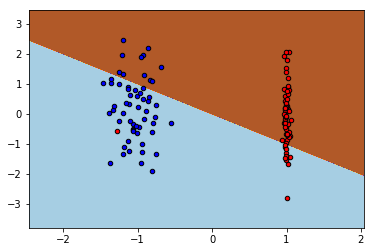

In [127]:
h = .02
colors = "bry"
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = cf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

for i, color in zip([0,1], colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20) 

In [128]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [129]:
print(f1_score(y_test, yp))

0.8666666666666666


In [113]:
tn, fp, fn, tp = confusion_matrix(y_test, yp).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 13
False Positive : 3
False Negative : 1
True Positive : 13


In [64]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.78      0.86      0.82        21

    accuracy                           0.87        60
   macro avg       0.85      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



## Model Sklearn

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

In [66]:
cfk = KNeighborsClassifier()

In [67]:
cfk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
f1_score(y_test, cfk.predict(X_test))

1.0

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, cfk.predict(X_test)).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 39
False Positive : 0
False Negative : 0
True Positive : 21


In [70]:
print(classification_report(y_test, cfk.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [71]:
cfks = SGDClassifier()

In [72]:
cfks.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
f1_score(y_test, cfks.predict(X_test))

1.0

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, cfks.predict(X_test)).ravel()
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 39
False Positive : 0
False Negative : 0
True Positive : 21


In [75]:
print(classification_report(y_test, cfks.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

